# Домашнее задание к лекции «Корреляция и корреляционный анализ»

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

In [2]:
water_mortality = pd.read_csv('water.csv')
water_mortality = water_mortality.drop('Unnamed: 0', axis=1)
water_mortality.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

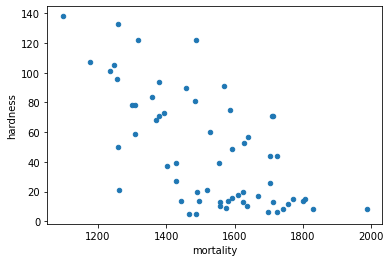

In [3]:
# визуализируем взаимосвязь жёсткости воды и средней годовой смертности
water_mortality.plot(kind='scatter', x='mortality', y='hardness')

In [4]:
# считаем коэф. корреляции Пирсона
water_mortality[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [5]:
# считаем коэф. корреляции Спирмана
water_mortality[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [6]:
# считаем коэф. корреляции Кенделла
water_mortality[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


In [7]:
# Построим модель линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X = water_mortality['hardness']
y = water_mortality['mortality']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
# LinearRegression отказывается работать с колонками и хочет 2D array
# конвертируем все в numpy array и применяем reshape(-1, 1) для превращения в 2D array
X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy()

In [11]:
# метод обучается на данных и подбирает оптимальные коэффициенты
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# расчитываем показатели для тестовой выборкии
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [13]:
# проверяем насколько совпадают предсказанные и реальные данные
# так как X_test это numpy array, превращаем его обратно в dataframe
X_test = pd.DataFrame(X_test, columns = ['mortality'])
X_test['y_pred'] = y_pred
X_test['y_test'] = y_test
X_test

,mortality,y_pred,y_test
0,105,1340.146856,1247
1,10,1637.655589,1558
2,14,1625.128906,1495
3,44,1531.178779,1702
4,78,1424.701970,1307
5,20,1606.338880,1625
6,133,1252.460072,1259
7,75,1434.096982,1587
8,21,1603.207209,1519
9,6,1650.182272,1696


In [14]:
# LinearRegression.score отказывается работать с колонками и хочет 2D array
# конвертируем X_test в numpy array и применяем reshape(-1, 1) для превращения в 2D array
X_test = X_test['mortality'].to_numpy().reshape(-1, 1)

In [15]:
# значение коэффициента детерминации
model.score(X_test, y_test)

0.5046490611017092

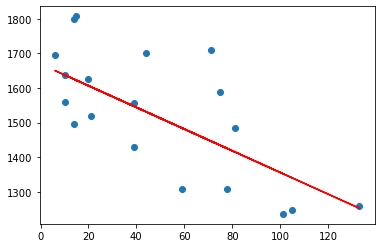

In [16]:
# строим граффик линейной регрессии
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

**Ответ на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью.**

Связь есть, но она средняя и скорее всего не причинно-следственная, то есть присутствует влияние других факторов, о которые нам не известных

## Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

In [17]:
water_mortality_south = water_mortality[water_mortality['location'] == 'South']
water_mortality_north = water_mortality[water_mortality['location'] == 'North']

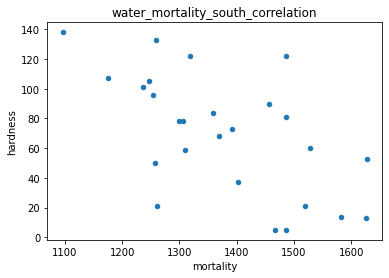

Text(0.5, 1.0, 'water_mortality_north_correlation')

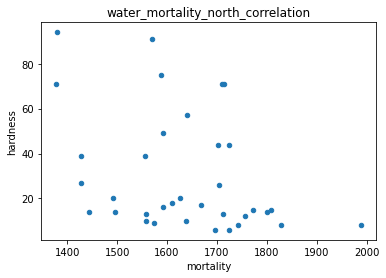

In [18]:
# визуализируем взаимосвязь жёсткости воды и средней годовой смертности
water_mortality_south.plot(kind='scatter', x='mortality', y='hardness')
plt.title('water_mortality_south_correlation')
plt.show()
water_mortality_north.plot(kind='scatter', x='mortality', y='hardness')
plt.title('water_mortality_north_correlation')

In [19]:
# считаем коэф. корреляции Пирсона юг и север
water_mortality.groupby('location').corr()

mortality  hardness
location                               
North    mortality   1.000000 -0.368598
         hardness   -0.368598  1.000000
South    mortality   1.000000 -0.602153
         hardness   -0.602153  1.000000

In [20]:
# считаем коэф. корреляции Спирмана юг и север
water_mortality.groupby('location').corr(method='spearman')

mortality  hardness
location                               
North    mortality   1.000000 -0.404208
         hardness   -0.404208  1.000000
South    mortality   1.000000 -0.595723
         hardness   -0.595723  1.000000

In [21]:
X_south = water_mortality_south['hardness']
y_south = water_mortality_south['mortality']

In [22]:
X_south_train, X_south_test, y_south_train, y_south_test = train_test_split(X, y, test_size=0.30, random_state=22)

In [23]:
# LinearRegression отказывается работать с колонками и хочет 2D array
# конвертируем все в numpy array и применяем reshape(-1, 1) для превращения в 2D array
X_south_train = X_south_train.to_numpy().reshape(-1, 1)
X_south_test = X_south_test.to_numpy().reshape(-1, 1)
y_south_test = y_south_test.to_numpy()

In [24]:
# метод обучается на данных и подбирает оптимальные коэффициенты
model = LinearRegression()
model.fit(X_south_train, y_south_train)

LinearRegression()

In [25]:
# расчитываем показатели для тестовой выборкии
y_south_pred = model.predict(X_south_test)
y_south_pred

array([1568.88843829, 1323.3884755 , 1277.92551943, 1584.04275698,
       1602.22793941, 1432.49957008, 1629.50571305, 1402.19093269,
       1608.28966689, 1529.4872097 , 1487.05511736, 1623.44398558,
       1229.43169962, 1605.25880315, 1420.37611512, 1468.86993493,
       1596.16621193, 1587.07362072, 1599.19707567])

In [26]:
# проверяем насколько совпадают предсказанные и реальные данные
# так как X_test это numpy array, превращаем его обратно в dataframe
X_south_test = pd.DataFrame(X_south_test, columns = ['mortality'])
X_south_test['y_pred'] = y_south_pred
X_south_test['y_test'] = y_south_test
X_south_test

,mortality,y_pred,y_test
0,26,1568.888438,1704
1,107,1323.388476,1175
2,122,1277.925519,1486
3,21,1584.042757,1519
4,15,1602.227939,1807
5,71,1432.499570,1713
6,6,1629.505713,1696
7,81,1402.190933,1485
8,13,1608.289667,1711
9,39,1529.487210,1555


In [27]:
# LinearRegression.score отказывается работать с колонками и хочет 2D array
# конвертируем X_test в numpy array и применяем reshape(-1, 1) для превращения в 2D array
X_south_test = X_south_test['mortality'].to_numpy().reshape(-1, 1)

In [28]:
# значение коэффициента детерминации
model.score(X_south_test, y_south_test)

0.4443291378558203

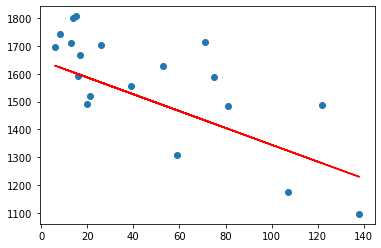

In [29]:
# строим граффик линейной регрессии
plt.scatter(X_south_test, y_south_test)
plt.plot(X_south_test, y_south_pred, c='r')

In [30]:
X_north = water_mortality_north['hardness']
y_north = water_mortality_north['mortality']

In [31]:
X_north_train, X_north_test, y_north_train, y_north_test = train_test_split(X, y, test_size=0.30, random_state=33)

In [32]:
# LinearRegression отказывается работать с колонками и хочет 2D array
# конвертируем все в numpy array и применяем reshape(-1, 1) для превращения в 2D array
X_north_train = X_north_train.to_numpy().reshape(-1, 1)
X_north_test = X_north_test.to_numpy().reshape(-1, 1)
y_north_test = y_north_test.to_numpy()

In [33]:
# метод обучается на данных и подбирает оптимальные коэффициенты
model = LinearRegression()
model.fit(X_north_train, y_north_train)

LinearRegression()

In [34]:
# расчитываем показатели для тестовой выборкии
y_north_pred = model.predict(X_north_test)
y_north_pred

array([1506.86401326, 1621.82172571, 1624.92869091, 1640.46351692,
       1624.92869091, 1460.25953523, 1628.03565612, 1652.89137773,
       1609.39386491, 1640.46351692, 1590.7520737 , 1628.03565612,
       1615.60779531, 1516.18490886, 1618.71476051, 1242.77197113,
       1379.47843999, 1631.14262132, 1450.93863963])

In [35]:
# проверяем насколько совпадают предсказанные и реальные данные
# так как X_test это numpy array, превращаем его обратно в dataframe
X_north_test = pd.DataFrame(X_north_test, columns = ['mortality'])
X_north_test['y_pred'] = y_north_pred
X_north_test['y_test'] = y_north_test
X_north_test

,mortality,y_pred,y_test
0,53,1506.864013,1627
1,16,1621.821726,1591
2,15,1624.928691,1772
3,10,1640.463517,1558
4,15,1624.928691,1807
5,68,1460.259535,1369
6,14,1628.035656,1581
7,6,1652.891378,1724
8,20,1609.393865,1491
9,10,1640.463517,1637


In [36]:
# LinearRegression.score отказывается работать с колонками и хочет 2D array
# конвертируем X_test в numpy array и применяем reshape(-1, 1) для превращения в 2D array
X_north_test = X_north_test['mortality'].to_numpy().reshape(-1, 1)

In [37]:
# значение коэффициента детерминации
model.score(X_north_test, y_north_test)

0.485777912139001

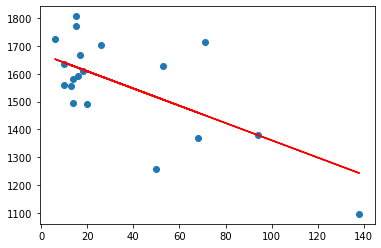

In [38]:
# строим граффик линейной регрессии
plt.scatter(X_north_test, y_north_test)
plt.plot(X_north_test, y_north_pred, c='r')

Аналогичная зависимость для северных и южных городов по отдельности сохраняется, но и корреляция и коэффициент детерминации стали ниже.

Что интересно корреляция ниже у северных городов, а детерминация у южных.